In [8]:
from sympy import *
from sympy.matrices import *
init_printing(use_latex=true)
import operator, functools

t1,t2,t3,t4,t5,t6,l1,l2,l3,d1,d2,d3,d4,d5,d6 = symbols('\\theta_1, \\theta_2, \\theta_3, \\theta_4, \\theta_5, \\theta_6, l_1,l_2,l_3,d_1,d_2,d_3,d_4,d_5,d_6')
x,y,z = symbols('x,y,z')

def dhs(a,alpha,d,theta):
    M = Matrix([[cos(theta),-sin(theta)*cos(alpha),sin(theta)*sin(alpha),a*cos(theta)],
                  [sin(theta),cos(theta)*cos(alpha),-cos(theta)*sin(alpha),a*sin(theta)],
                  [0,sin(alpha),cos(alpha),d],
                  [0,0,0,1]])
    return M

class Manipulator(object):
    def __init__(self,*args):
        self.Ts = []
        self.type = []
        for k in args:
            self.Ts.append(dhs(k[0],k[1],k[2],k[3]))
            if len(k)>4:
                self.type.append(k[4])
            else:
                self.type.append('r')
        self.dof = len(args)
    
    def z(self,i):
        if i == 0: return Matrix([[0],[0],[1]])
        MTH = eye(4)
        for k in range(i):
            MTH = MTH*self.Ts[k]
        return MTH[:3,2]
    
    def p(self,i):
        if i == 0: return Matrix([[0],[0],[0]])
        MTH = eye(4)
        for k in range(i):
            MTH = MTH*self.Ts[k]
        return MTH[:3,3]
    
    @property
    def J(self):
        n = self.dof
        M_ = zeros(6,n)
        for i in range(self.dof):
            if self.type[i]=='r':
                jp = self.z(i).cross(self.p(n) - self.p(i))
                jo = self.z(i)
            else:
                jp = self.z(i)
                jo = zeros(3,1)
            jp = jp.col_join(jo)
            M_[:,i] = jp
        return simplify(M_)
    
    @property
    def T(self):
        return simplify(functools.reduce(operator.mul, self.Ts))

In [9]:
RRR = Manipulator((0,pi/2,d1,t1),(l2,0,0,t2),(l3,0,0,t3)) # RRR
PPP = Manipulator((0,pi/2,d1,0,'p'), (0,pi/2,d2,pi/2,'p'), (0,0,d3,0,'p')) # PPP

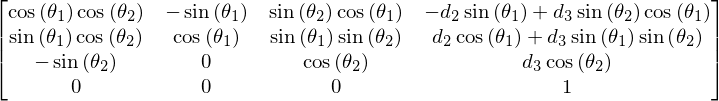

In [11]:
SM = Manipulator((0,-pi/2,0,t1),(0,pi/2,d2,t2),(0,0,d3,0,'p')) # RRP
SM.T

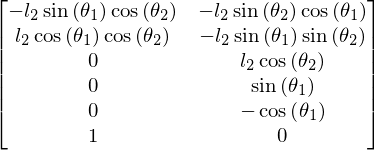

In [14]:
RR = Manipulator((0,pi/2,0,t1),(l2,0,0,t2)) # RR
J2R = RR.J
J2R

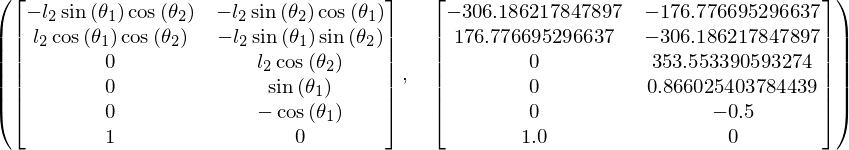

In [13]:
J2R,J2R.subs({t1:60*pi/180, t2:45*pi/180, l2:500}).evalf()

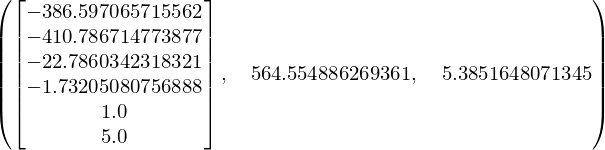

In [6]:
JME = SM.J.subs({t1:60*pi/180, t2:15*pi/180, d3:100, d2:150}).evalf()
VV = JME*Matrix([[5],[2],[30]])
v = sqrt(VV[0]**2+VV[1]**2+VV[2]**2)
w = sqrt(VV[3]**2+VV[4]**2+VV[5]**2)
VV,v,w

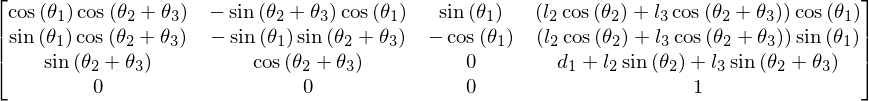

In [16]:
RRR = Manipulator((0,pi/2,d1,t1),(l2,0,0,t2),(l3,0,0,t3)) # RRR
RRR.T

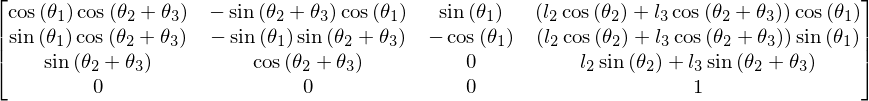

In [17]:
RRR = Manipulator((0,pi/2,0,t1),(l2,0,0,t2),(l3,0,0,t3)) # RRR
RRR.T